In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from utils import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rd81\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
train_df, val_df = get_processed_data(dev=False)

In [7]:
val_df

,propaganda,snippet_label,original,original_sentence_no_tags,snippet_original,sentence_tokenised_no_tags,snippet_tokenised
0,0,not_propaganda,"On average, between 300 and 600 infections are...","On average, between 300 and 600 infections are...",according to a UN estimate.,"[On, average, ,, between, 300, and, 600, infec...","[according, to, a, UN, estimate, .]"
1,1,causal_oversimplification,Mostly because <BOS> the country would not las...,Mostly because the country would not last lon...,the country would not last long without an out...,"[Mostly, because, the, country, would, not, la...","[the, country, would, not, last, long, without..."
2,1,appeal_to_fear_prejudice,Lyndon Johnson <BOS> gets Earl Warren and Sen....,Lyndon Johnson gets Earl Warren and Sen. Rich...,gets Earl Warren and Sen. Richard Russel to jo...,"[Lyndon, Johnson, gets, Earl, Warren, and, Sen...","[gets, Earl, Warren, and, Sen., Richard, Russe..."
3,0,not_propaganda,<BOS> You <EOS> may opt out at anytime.,You may opt out at anytime.,You,"[You, may, opt, out, at, anytime, .]",[You]
4,1,repetition,It must be exacted from him directly in order ...,It must be exacted from him directly in order ...,infidels,"[It, must, be, exacted, from, him, directly, i...",[infidels]
...,...,...,...,...,...,...,...
635,0,not_propaganda,"NewsCatholic Church, <BOS> Family, Marriage <E...","NewsCatholic Church, Family, Marriage","Family, Marriage","[NewsCatholic, Church, ,, Family, ,, Marriage]","[Family, ,, Marriage]"
636,0,not_propaganda,"Remember our saying, modern day fairy <BOS> ta...","Remember our saying, modern day fairy tales s...",tales start with ‘once I am,"[Remember, our, saying, ,, modern, day, fairy,...","[tales, start, with, ‘, once, I, am]"
637,0,not_propaganda,Why <BOS> not <EOS> open up to Iran with massi...,Why not open up to Iran with massive amounts...,not,"[Why, not, open, up, to, Iran, with, massive, ...",[not]
638,1,flag_waving,<BOS> He also sang an Islamic State fight song...,He also sang an Islamic State fight song and ...,He also sang an Islamic State fight song and r...,"[He, also, sang, an, Islamic, State, fight, so...","[He, also, sang, an, Islamic, State, fight, so..."


In [8]:
train_df_mult = train_df.drop(train_df[train_df['snippet_label'] == 'not_propaganda'].index)
val_df_mult = val_df.drop(val_df[val_df['snippet_label'] == 'not_propaganda'].index)
val_df_mult.shape
train_df_mult.shape

(309, 7)

(1291, 7)

In [9]:
def show_class_distros(dataframe, data_type='unspecified'):
    labels = dataframe["snippet_label"].unique()
    label_counts = [len(dataframe[dataframe["snippet_label"]==label]) for label in labels]
    
    # Create a color palette with a unique color for each bar
    palette = sns.color_palette("hsv", len(labels))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))  # Adjust the figure size as needed
    
    # Create the first barplot
    sns.barplot(x=labels, y=label_counts, palette=palette, ax=ax1)
    ax1.set_xlabel('Label', fontsize=14)
    ax1.set_ylabel('Count', fontsize=14)
    ax1.set_title(f'{data_type}\n\nLabel Counts', fontsize=16)
    ax1.set_xticklabels(labels, rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels by 45 degrees
    
    # Create the second barplot for propaganda vs non-propaganda
    non_propaganda_count = len(dataframe[dataframe["snippet_label"] == "not_propaganda"])
    propaganda_count = len(dataframe) - non_propaganda_count
    labels_prop = ["Non-Propaganda", "Propaganda"]
    counts_prop = [non_propaganda_count, propaganda_count]
    palette_prop = sns.color_palette("Set2", 2)  # Choose a different color palette
    
    sns.barplot(x=labels_prop, y=counts_prop, palette=palette_prop, ax=ax2)
    ax2.set_xlabel('Category', fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)
    ax2.set_title(f'{data_type}\n\nPropaganda vs Non-Propaganda Counts', fontsize=16)
    ax2.set_xticklabels(labels_prop, rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels by 45 degrees
    
    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

c:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


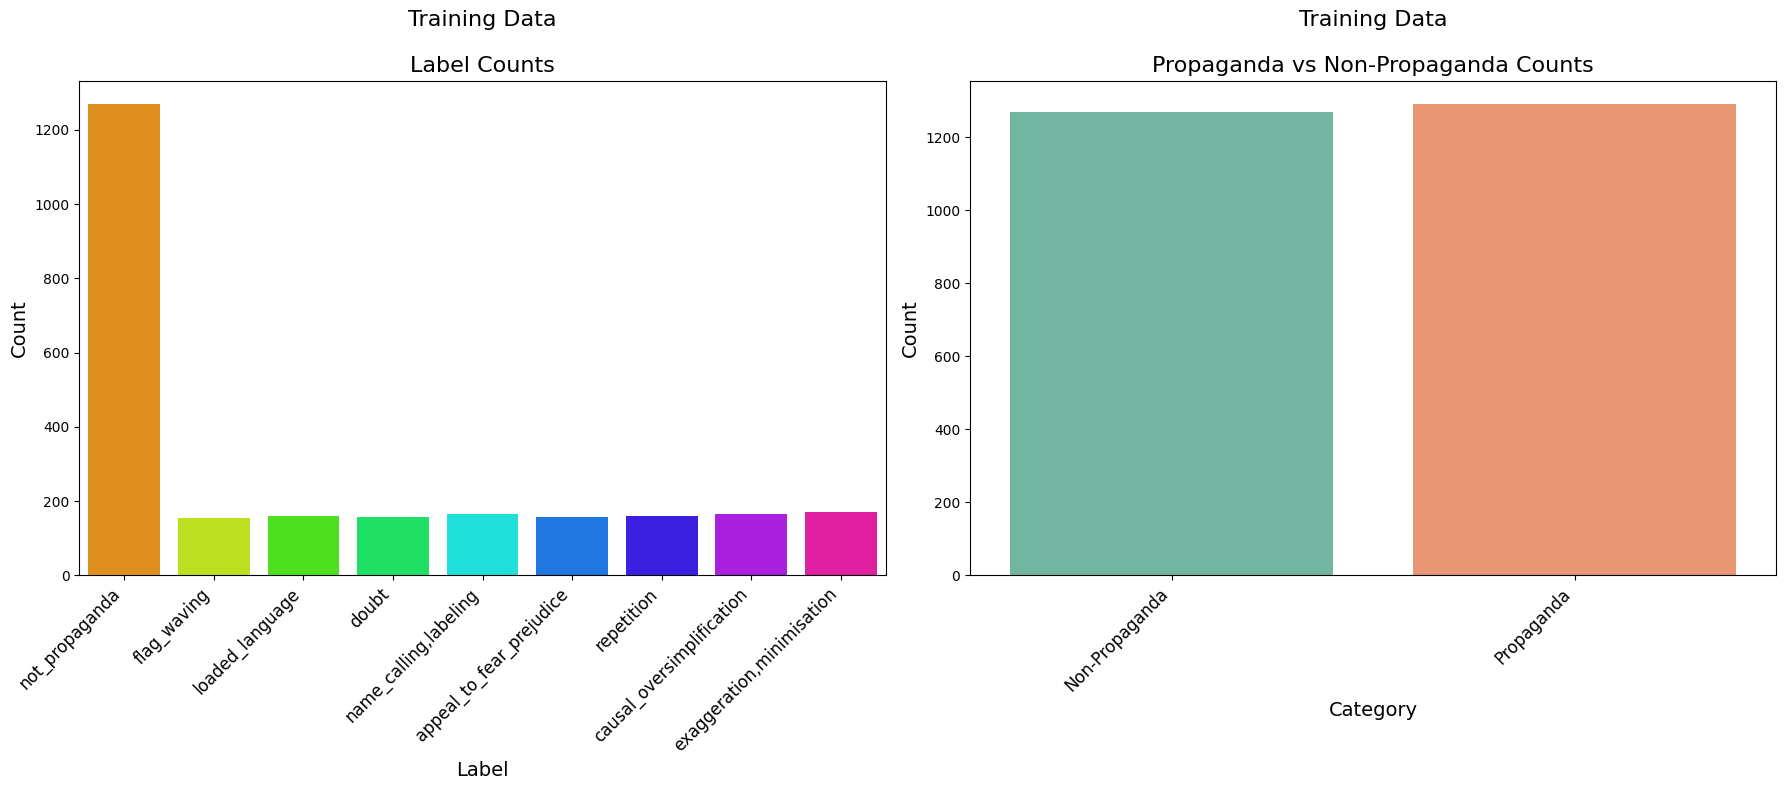

c:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


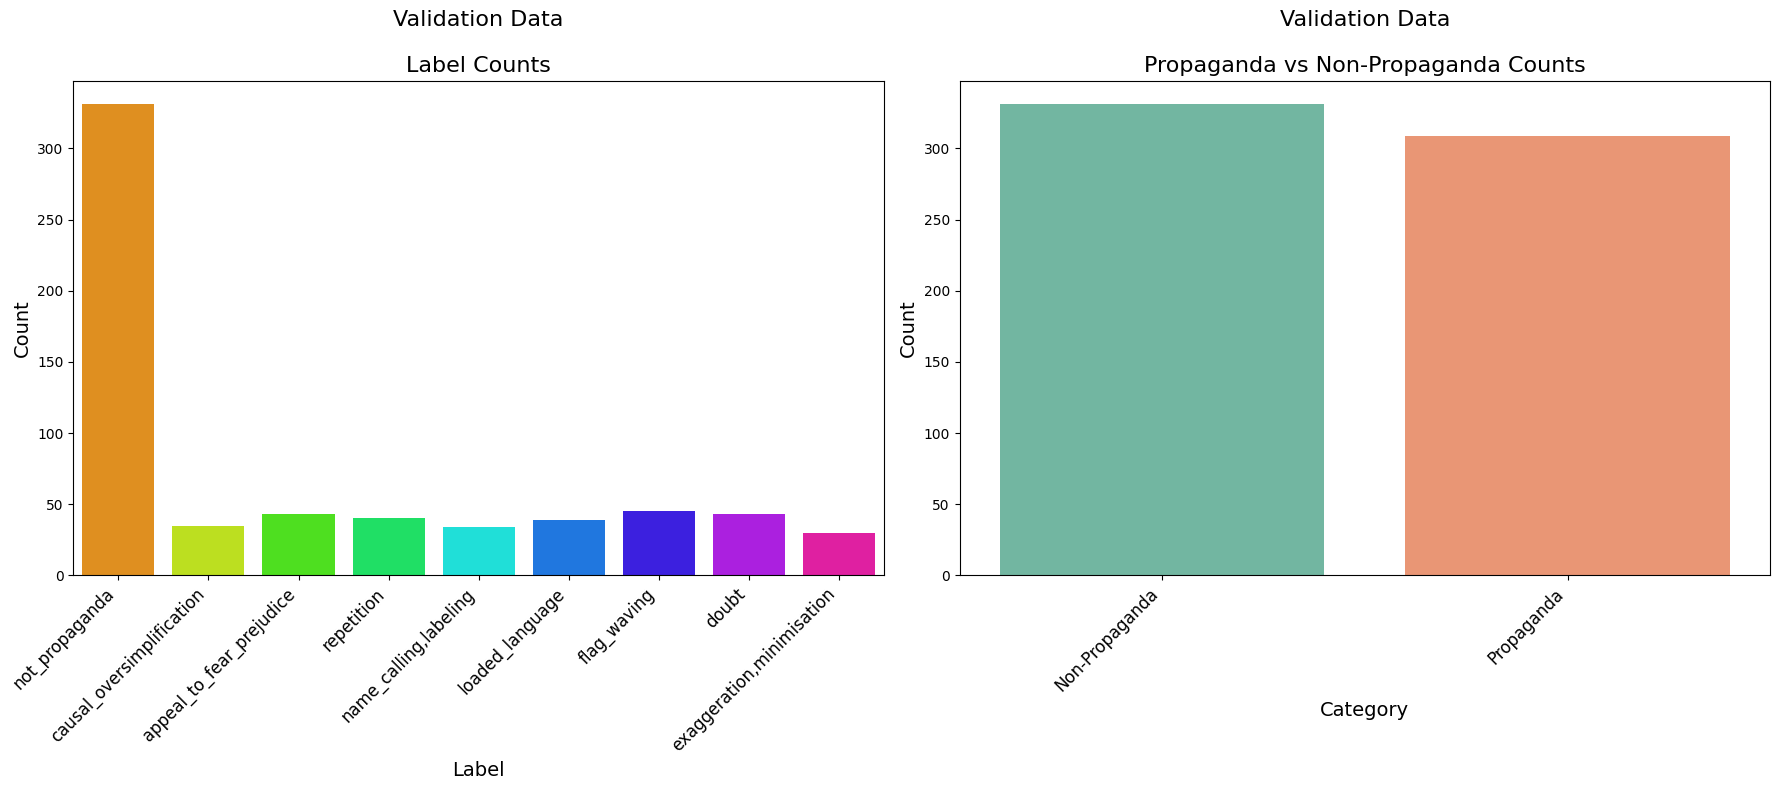

c:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


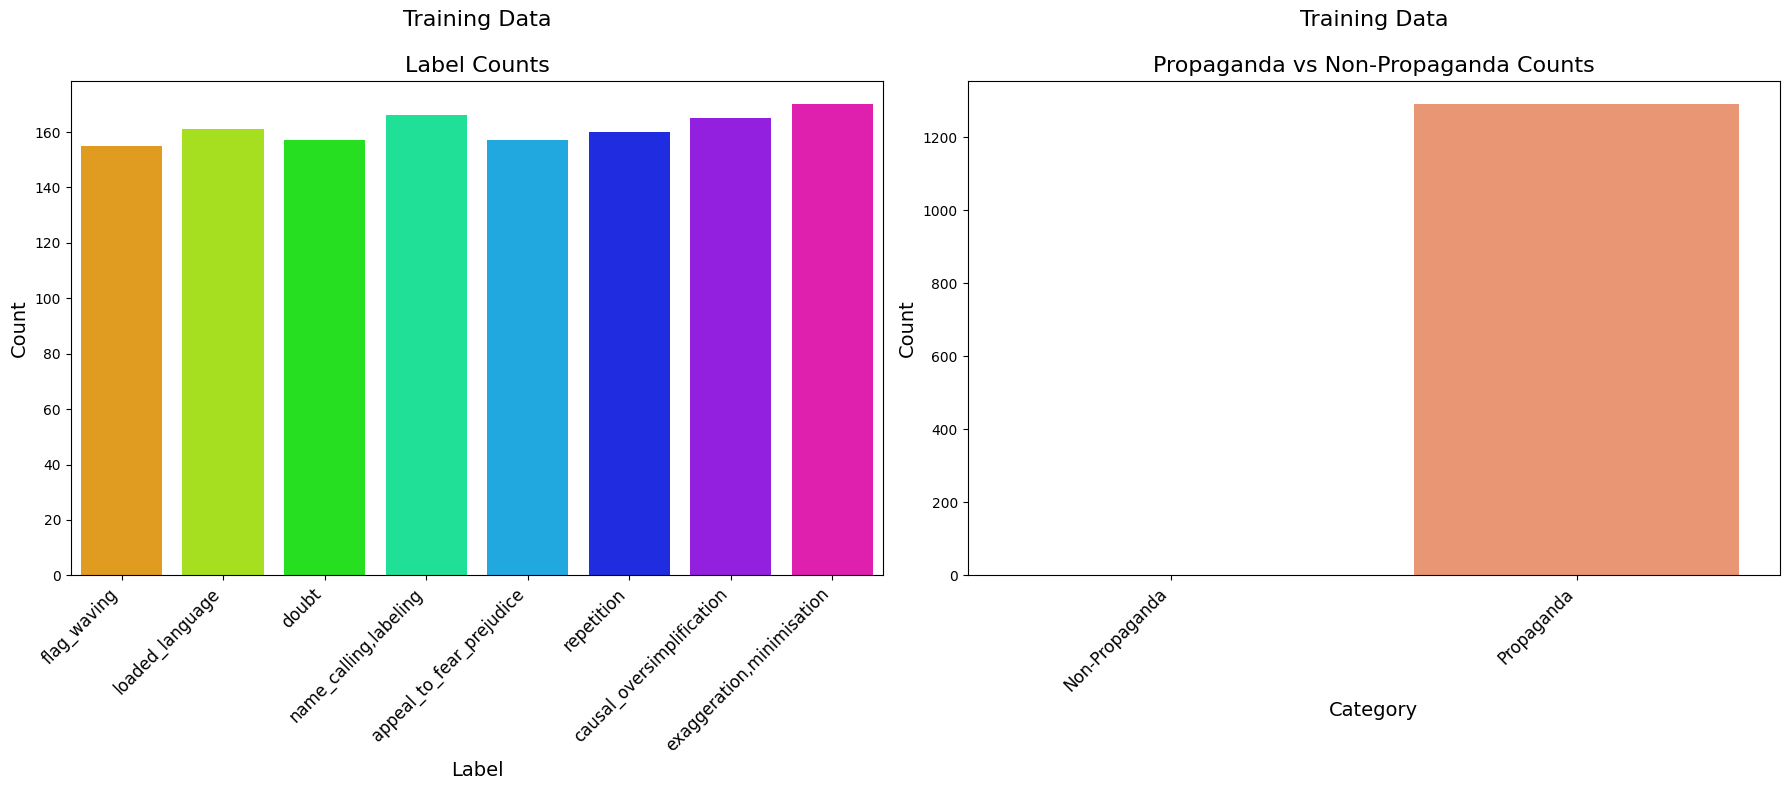

c:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


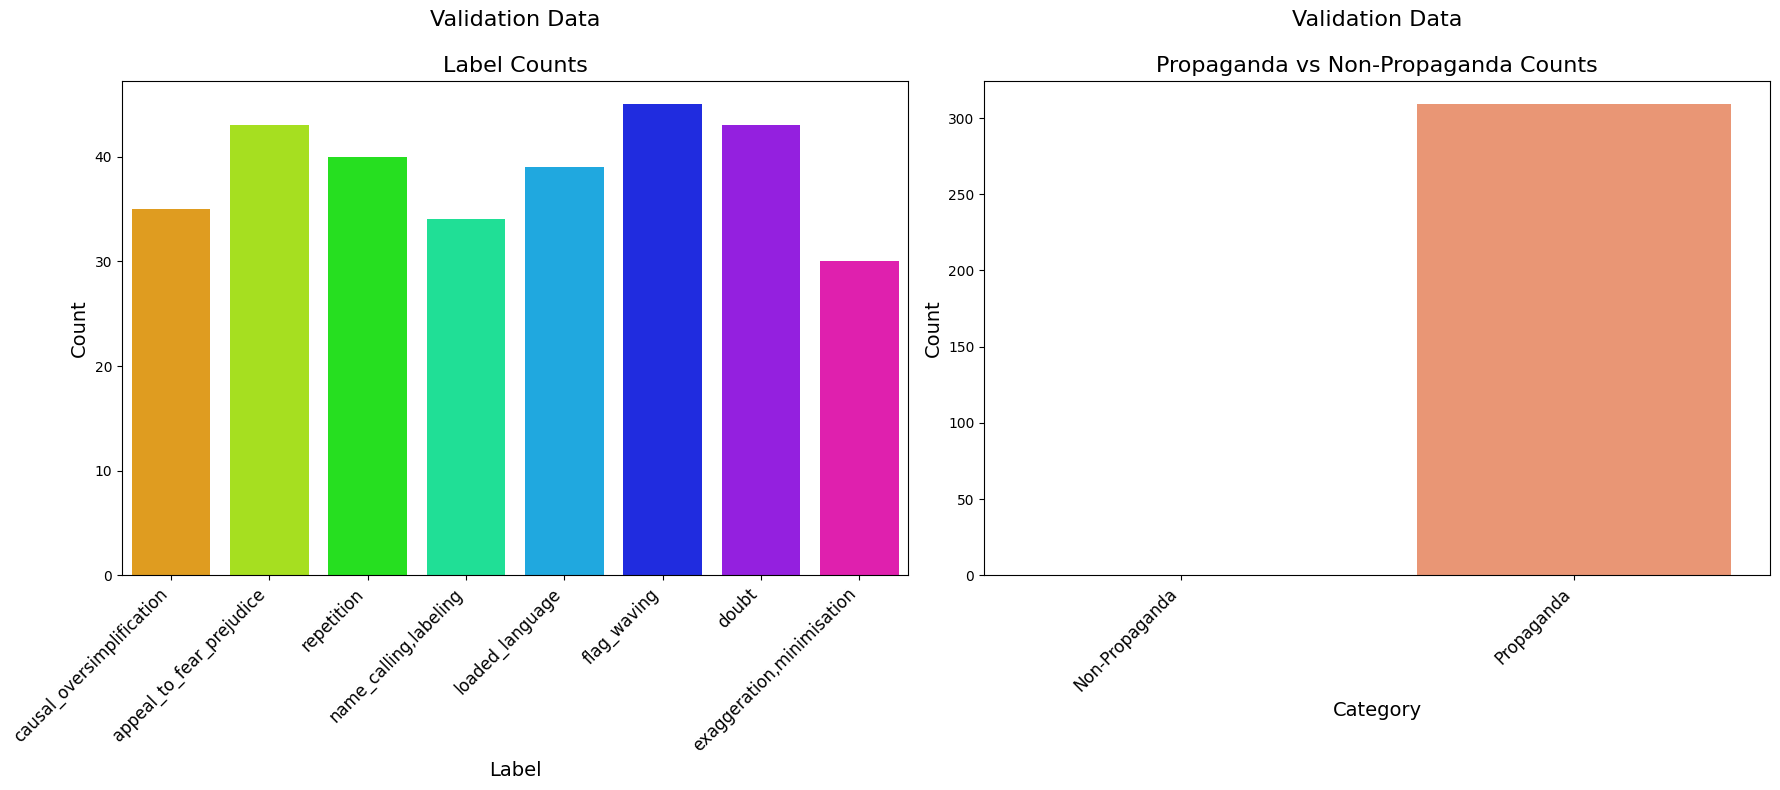

In [10]:
show_class_distros(train_df, "Training Data")
show_class_distros(val_df, "Validation Data")
show_class_distros(train_df_mult, "Training Data")
show_class_distros(val_df_mult, "Validation Data")


In [11]:
# BINARY CLASSIFICATION PROP NOT PROP (SENTS)

binary_train_df = train_df.drop(labels='label', axis = 1)
binary_train_df.head()
binary_labels = binary_train_df['propaganda']
binary_sents = binary_train_df['untagged_non_tokenized_sentence']
X_train_sents, X_test_sents, y_train_sents, y_test_sents = train_test_split(binary_sents, binary_labels, test_size=0.2, random_state=42)

vectorizer_sents=CountVectorizer(stop_words='english')
vectorizer_sents.fit(X_train_sents)
vectorised_sents = vectorizer_sents.transform(X_train_sents)

classifier_sents=MultinomialNB()
classifier_sents.fit(vectorised_sents,y_train_sents)

vectorised_test_sents = vectorizer_sents.transform(X_test_sents)

predictions_sents = classifier_sents.predict(vectorised_test_sents)

count = 0
correct = 0

for i, val in enumerate(predictions_sents):
  count += 1
  if val == list(y_test_sents)[i]:
    correct += 1

print(f"accuracy = {correct/count}")

predictions_sents = classifier_sents.predict(vectorised_test_sents)

# Generate confusion matrix
conf_matrix_sents = confusion_matrix(y_test_sents, predictions_sents)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sents, display_labels=classifier_sents.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision for each class
precision_per_class = precision_score(y_test_sents, predictions_sents, average=None)

# Calculate Recall for each class
recall_per_class = recall_score(y_test_sents, predictions_sents, average=None)

# Calculate F1 Score for each class
f1_score_per_class = f1_score(y_test_sents, predictions_sents, average=None)

# Display the scores for each class
for i, class_label in enumerate(classifier_sents.classes_):
    print(f"Class: {class_label}")
    print(f"Precision: {precision_per_class[i]}")
    print(f"Recall: {recall_per_class[i]}")
    print(f"F1 Score: {f1_score_per_class[i]}\n")
    
    
# Calculate accuracy - no need for average, as accuracy is inherently a macro-average metric
accuracy = accuracy_score(y_test_sents, predictions_sents)

# Calculate precision, recall, and F1-score with macro averaging
precision_macro = precision_score(y_test_sents, predictions_sents, average='macro')
recall_macro = recall_score(y_test_sents, predictions_sents, average='macro')
f1_macro = f1_score(y_test_sents, predictions_sents, average='macro')

# Calculate precision, recall, and F1-score with micro averaging
precision_micro = precision_score(y_test_sents, predictions_sents, average='micro')
recall_micro = recall_score(y_test_sents, predictions_sents, average='micro')
f1_micro = f1_score(y_test_sents, predictions_sents, average='micro')

# Calculate precision, recall, and F1-score with weighted average
precision_weighted = precision_score(y_test_sents, predictions_sents, average='weighted')
recall_weighted = recall_score(y_test_sents, predictions_sents, average='weighted')
f1_weighted = f1_score(y_test_sents, predictions_sents, average='weighted')

# Print the scores

print(f"Accuracy: {accuracy}")
print(f"\nMacro Precision: {precision_macro}")
print(f"Macro Recall: {recall_macro}")
print(f"Macro F1 Score: {f1_macro}\n")
print(f"Micro Precision: {precision_micro}")
print(f"Micro Recall: {recall_micro}")
print(f"Micro F1 Score: {f1_micro}\n")
print(f"Weighted Precision: {precision_weighted}")
print(f"Weighted Recall: {recall_weighted}")
print(f"Weighted F1 Score: {f1_weighted}")

KeyError: "['label'] not found in axis"

Vocabulary:  {'strong': 3719, 'action': 104, 'at': 353, 'totally': 3945, 'conflicted': 802, 'to': 3928, 'replace': 3241, 'outgoing': 2749, 'supreme': 3775, 'video': 4141, 'https': 1881, 'co': 725, 'laucjertnc': 2220, 'news4sa': 2585, 'kabbfox29': 2160, 'pic': 2869, 'twitter': 4015, 'com': 736, 'akznsp4ps8': 175, 'she': 3517, 'is': 2089, 'compete': 762, 'with': 4285, 'the': 3865, 'great': 1718, 'economist': 1244, 'banning': 411, 'situation': 3574, 'first': 1545, 'responders': 3273, 'who': 4253, 'are': 297, 'headed': 1790, 'in': 1951, 'equipment': 1352, 'treason': 3971, 'were': 4236, 'targeted': 3825, 'for': 1580, 'removal': 3231, 'either': 1264, 'because': 433, 'they': 3880, 'jewish': 2125, 'or': 2716, 'he': 1788, 'had': 1751, 'that': 3864, 'written': 4322, 'down': 1200, 'and': 235, 'figured': 1525, 'out': 2745, 'so': 3596, 'would': 4312, 'know': 2192, 'where': 4245, 'shoot': 3527, 'hit': 1839, 'autonomy': 389, 'guardian': 1737, 'silently': 3558, 'edited': 1249, 'story': 3708, 'steinle'

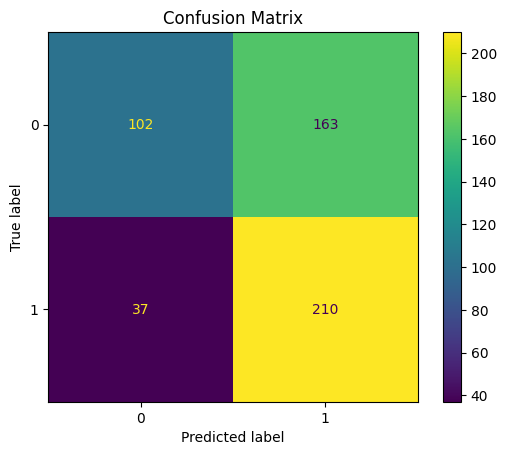

Class: 0
Precision: 0.7338129496402878
Recall: 0.3849056603773585
F1 Score: 0.504950495049505

Class: 1
Precision: 0.5630026809651475
Recall: 0.8502024291497976
F1 Score: 0.6774193548387096

Accuracy: 0.609375

Macro Precision: 0.6484078153027176
Macro Recall: 0.6175540447635781
Macro F1 Score: 0.5911849249441072

Micro Precision: 0.609375
Micro Recall: 0.609375
Micro F1 Score: 0.609375

Weighted Precision: 0.6514103395567727
Weighted Recall: 0.609375
Weighted F1 Score: 0.5881532457681251


In [ ]:
# BINARY CLASS SNIPS

binary_train_df.head()
binary_labels = binary_train_df['propaganda']
binary_snips = binary_train_df['joined_snippet']
X_train_snips, X_test_snips, y_train_snips, y_test_snips = train_test_split(binary_snips, binary_labels, test_size=0.2, random_state=42)

vectorizer_snips=CountVectorizer()
vectorizer_snips.fit(X_train_snips)
vectorised_snips = vectorizer_snips.transform(X_train_snips)

print("Vocabulary: ", vectorizer_snips.vocabulary_)
print(len( vectorizer_snips.vocabulary_))
print(vectorised_snips.shape)
classifier_snips=MultinomialNB()
classifier_snips.fit(vectorised_snips,y_train_snips)
vectorised_test_snips = vectorizer_snips.transform(X_test_snips)

predictions_snips = classifier_snips.predict(vectorised_test_snips)

count = 0
correct = 0

for i, val in enumerate(predictions_snips):
  count += 1
  if val == list(y_test_snips)[i]:
    correct += 1

print(f"accuracy = {correct/count}")



predictions_snips = classifier_snips.predict(vectorised_test_snips)

# Generate confusion matrix
conf_matrix_snips = confusion_matrix(y_test_snips, predictions_snips)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_snips, display_labels=classifier_snips.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision for each class
precision_per_class = precision_score(y_test_snips, predictions_snips, average=None)

# Calculate Recall for each class
recall_per_class = recall_score(y_test_snips, predictions_snips, average=None)

# Calculate F1 Score for each class
f1_score_per_class = f1_score(y_test_snips, predictions_snips, average=None)

# Display the scores for each class
for i, class_label in enumerate(classifier_snips.classes_):
    print(f"Class: {class_label}")
    print(f"Precision: {precision_per_class[i]}")
    print(f"Recall: {recall_per_class[i]}")
    print(f"F1 Score: {f1_score_per_class[i]}\n")
    
    
    
# Calculate accuracy - no need for average, as accuracy is inherently a macro-average metric
accuracy = accuracy_score(y_test_snips, predictions_snips)

# Calculate precision, recall, and F1-score with macro averaging
precision_macro = precision_score(y_test_snips, predictions_snips, average='macro')
recall_macro = recall_score(y_test_snips, predictions_snips, average='macro')
f1_macro = f1_score(y_test_snips, predictions_snips, average='macro')

# Calculate precision, recall, and F1-score with micro averaging
precision_micro = precision_score(y_test_snips, predictions_snips, average='micro')
recall_micro = recall_score(y_test_snips, predictions_snips, average='micro')
f1_micro = f1_score(y_test_snips, predictions_snips, average='micro')

# Calculate precision, recall, and F1-score with weighted average
precision_weighted = precision_score(y_test_snips, predictions_snips, average='weighted')
recall_weighted = recall_score(y_test_snips, predictions_snips, average='weighted')
f1_weighted = f1_score(y_test_snips, predictions_snips, average='weighted')

# Print the scores
print(f"Accuracy: {accuracy}")
print(f"\nMacro Precision: {precision_macro}")
print(f"Macro Recall: {recall_macro}")
print(f"Macro F1 Score: {f1_macro}\n")
print(f"Micro Precision: {precision_micro}")
print(f"Micro Recall: {recall_micro}")
print(f"Micro F1 Score: {f1_micro}\n")
print(f"Weighted Precision: {precision_weighted}")
print(f"Weighted Recall: {recall_weighted}")
print(f"Weighted F1 Score: {f1_weighted}")

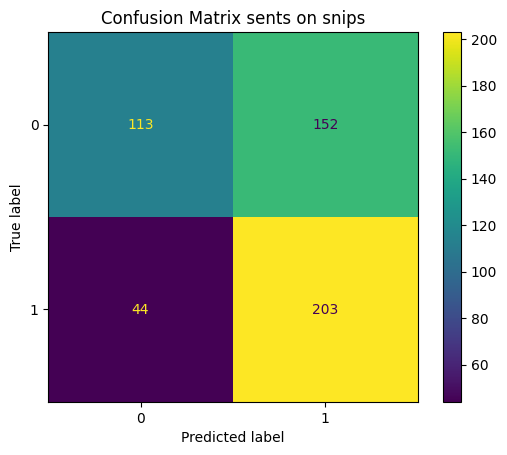

Class: 0
Precision: 0.7197452229299363
Recall: 0.42641509433962266
F1 Score: 0.5355450236966824

Class: 1
Precision: 0.571830985915493
Recall: 0.8218623481781376
F1 Score: 0.6744186046511628

Accuracy: 0.6171875

Macro Precision: 0.6457881044227146
Macro Recall: 0.6241387212588801
Macro F1 Score: 0.6049818141739226

Micro Precision: 0.6171875
Micro Recall: 0.6171875
Micro F1 Score: 0.6171875

Weighted Precision: 0.6483881593702341
Weighted Recall: 0.6171875
Weighted F1 Score: 0.6025406770087072


In [ ]:
# sentence on snips

vectorised_snips_as_sents = vectorizer_sents.transform(X_train_snips)
vectorised_test_snips_as_sents = vectorizer_sents.transform(X_test_snips)

preds_1 = classifier_sents.predict(vectorised_test_snips_as_sents)
# Generate confusion matrix
conf_matrix_1 = confusion_matrix(y_test_snips, preds_1)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_1, display_labels=classifier_snips.classes_)
disp.plot()
plt.title('Confusion Matrix sents on snips')
plt.show()

# Calculate Precision for each class
precision_per_class = precision_score(y_test_snips, preds_1, average=None)

# Calculate Recall for each class
recall_per_class = recall_score(y_test_snips, preds_1, average=None)

# Calculate F1 Score for each class
f1_score_per_class = f1_score(y_test_snips, preds_1, average=None)

# Display the scores for each class
for i, class_label in enumerate(classifier_sents.classes_):
    print(f"Class: {class_label}")
    print(f"Precision: {precision_per_class[i]}")
    print(f"Recall: {recall_per_class[i]}")
    print(f"F1 Score: {f1_score_per_class[i]}\n")
    
    
# Calculate accuracy - no need for average, as accuracy is inherently a macro-average metric
accuracy = accuracy_score(y_test_snips, preds_1)

# Calculate precision, recall, and F1-score with macro averaging
precision_macro = precision_score(y_test_snips, preds_1, average='macro')
recall_macro = recall_score(y_test_snips, preds_1, average='macro')
f1_macro = f1_score(y_test_snips, preds_1, average='macro')

# Calculate precision, recall, and F1-score with micro averaging
precision_micro = precision_score(y_test_snips, preds_1, average='micro')
recall_micro = recall_score(y_test_snips, preds_1, average='micro')
f1_micro = f1_score(y_test_snips, preds_1, average='micro')

# Calculate precision, recall, and F1-score with weighted average
precision_weighted = precision_score(y_test_snips, preds_1, average='weighted')
recall_weighted = recall_score(y_test_snips, preds_1, average='weighted')
f1_weighted = f1_score(y_test_snips, preds_1, average='weighted')

# Print the scores
print(f"Accuracy: {accuracy}")
print(f"\nMacro Precision: {precision_macro}")
print(f"Macro Recall: {recall_macro}")
print(f"Macro F1 Score: {f1_macro}\n")
print(f"Micro Precision: {precision_micro}")
print(f"Micro Recall: {recall_micro}")
print(f"Micro F1 Score: {f1_micro}\n")
print(f"Weighted Precision: {precision_weighted}")
print(f"Weighted Recall: {recall_weighted}")
print(f"Weighted F1 Score: {f1_weighted}")

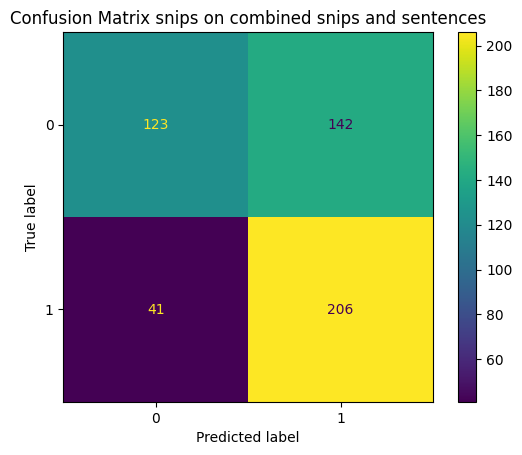

Class: 0
Precision: 0.75
Recall: 0.4641509433962264
F1 Score: 0.5734265734265734

Class: 1
Precision: 0.5919540229885057
Recall: 0.8340080971659919
F1 Score: 0.692436974789916

Accuracy: 0.642578125

Macro Precision: 0.6709770114942528
Macro Recall: 0.6490795202811092
Macro F1 Score: 0.6329317741082447

Micro Precision: 0.642578125
Micro Recall: 0.642578125
Micro F1 Score: 0.642578125

Weighted Precision: 0.6737551634339081
Weighted Recall: 0.642578125
Weighted F1 Score: 0.6308397943967797


In [ ]:
# snips on sentence

vectorised_sents_as_snips = vectorizer_snips.transform(X_train_sents)
vectorised_test_sents_as_snips = vectorizer_snips.transform(X_test_sents)

preds_2 = classifier_snips.predict(vectorised_test_sents_as_snips)
# Generate confusion matrix
conf_matrix_2 = confusion_matrix(y_test_sents, preds_2)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_2, display_labels=classifier_sents.classes_)
disp.plot()
plt.title('Confusion Matrix snips on combined snips and sentences')
plt.show()

# Calculate Precision for each class
precision_per_class = precision_score(y_test_sents, preds_2, average=None)

# Calculate Recall for each class
recall_per_class = recall_score(y_test_sents, preds_2, average=None)

# Calculate F1 Score for each class
f1_score_per_class = f1_score(y_test_sents, preds_2, average=None)

# Display the scores for each class
for i, class_label in enumerate(classifier_snips.classes_):
    print(f"Class: {class_label}")
    print(f"Precision: {precision_per_class[i]}")
    print(f"Recall: {recall_per_class[i]}")
    print(f"F1 Score: {f1_score_per_class[i]}\n")
    
    
# Calculate accuracy - no need for average, as accuracy is inherently a macro-average metric
accuracy = accuracy_score(y_test_sents, preds_2)

# Calculate precision, recall, and F1-score with macro averaging
precision_macro = precision_score(y_test_sents, preds_2, average='macro')
recall_macro = recall_score(y_test_sents, preds_2, average='macro')
f1_macro = f1_score(y_test_sents, preds_2, average='macro')

# Calculate precision, recall, and F1-score with micro averaging
precision_micro = precision_score(y_test_sents, preds_2, average='micro')
recall_micro = recall_score(y_test_sents, preds_2, average='micro')
f1_micro = f1_score(y_test_sents, preds_2, average='micro')

# Calculate precision, recall, and F1-score with weighted average
precision_weighted = precision_score(y_test_sents, preds_2, average='weighted')
recall_weighted = recall_score(y_test_sents, preds_2, average='weighted')
f1_weighted = f1_score(y_test_sents, preds_2, average='weighted')

# Print the scores
print(f"Accuracy: {accuracy}")
print(f"\nMacro Precision: {precision_macro}")
print(f"Macro Recall: {recall_macro}")
print(f"Macro F1 Score: {f1_macro}\n")
print(f"Micro Precision: {precision_micro}")
print(f"Micro Recall: {recall_micro}")
print(f"Micro F1 Score: {f1_micro}\n")
print(f"Weighted Precision: {precision_weighted}")
print(f"Weighted Recall: {recall_weighted}")
print(f"Weighted F1 Score: {f1_weighted}")

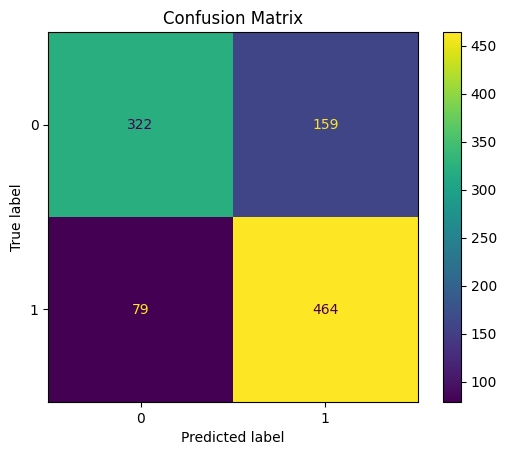

Class: 0
Precision: 0.8029925187032418
Recall: 0.6694386694386695
F1 Score: 0.7301587301587301

Class: 1
Precision: 0.7447833065810594
Recall: 0.85451197053407
F1 Score: 0.7958833619210978

Accuracy: 0.767578125

Macro Precision: 0.7738879126421506
Macro Recall: 0.7619753199863697
Macro F1 Score: 0.7630210460399139

Micro Precision: 0.767578125
Micro Recall: 0.767578125
Micro F1 Score: 0.767578125

Weighted Precision: 0.7721257196970455
Weighted Recall: 0.767578125
Weighted F1 Score: 0.7650107565717825


In [ ]:
# combined

binary_train_df = train_df.drop(labels='label', axis = 1)
binary_train_df.head()

combined_df = pd.concat([train_df['untagged_non_tokenized_sentence'], train_df['joined_snippet']])
combined_df.reset_index(drop=True, inplace=True)

combined_df
propaganda_series = pd.concat([train_df['propaganda'], train_df['propaganda']])
propaganda_series.reset_index(drop=True, inplace=True)

combined_df = pd.concat([combined_df, propaganda_series], axis=1)
combined_df.columns = ['combined_snippets_and_non_tokenized_sentence', 'propaganda']

combined_df

binary_labels = combined_df['propaganda']
features = combined_df['combined_snippets_and_non_tokenized_sentence']
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(features, binary_labels, test_size=0.2, random_state=42)

vectorizer_combined=CountVectorizer()
vectorizer_combined.fit(X_train_combined)
vectorised_combined = vectorizer_combined.transform(X_train_combined)

classifier_combined=MultinomialNB()
classifier_combined.fit(vectorised_combined,y_train_combined)
vectorised_test_combined = vectorizer_combined.transform(X_test_combined)

predictions_combined = classifier_combined.predict(vectorised_test_combined)

# Generate confusion matrix
conf_matrix_combined = confusion_matrix(y_test_combined, predictions_combined)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_combined, display_labels=classifier_combined.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Assuming y_test_combined are the true labels and predictions_combined are the predictions from your classifier

# Calculate Precision for each class
precision_per_class = precision_score(y_test_combined, predictions_combined, average=None)

# Calculate Recall for each class
recall_per_class = recall_score(y_test_combined, predictions_combined, average=None)

# Calculate F1 Score for each class
f1_score_per_class = f1_score(y_test_combined, predictions_combined, average=None)

# Display the scores for each class
for i, class_label in enumerate(classifier_combined.classes_):
    print(f"Class: {class_label}")
    print(f"Precision: {precision_per_class[i]}")
    print(f"Recall: {recall_per_class[i]}")
    print(f"F1 Score: {f1_score_per_class[i]}\n")
    
    
# Calculate accuracy - no need for average, as accuracy is inherently a macro-average metric
accuracy = accuracy_score(y_test_combined, predictions_combined)

# Calculate precision, recall, and F1-score with macro averaging
precision_macro = precision_score(y_test_combined, predictions_combined, average='macro')
recall_macro = recall_score(y_test_combined, predictions_combined, average='macro')
f1_macro = f1_score(y_test_combined, predictions_combined, average='macro')

# Calculate precision, recall, and F1-score with micro averaging
precision_micro = precision_score(y_test_combined, predictions_combined, average='micro')
recall_micro = recall_score(y_test_combined, predictions_combined, average='micro')
f1_micro = f1_score(y_test_combined, predictions_combined, average='micro')

# Calculate precision, recall, and F1-score with weighted average
precision_weighted = precision_score(y_test_combined, predictions_combined, average='weighted')
recall_weighted = recall_score(y_test_combined, predictions_combined, average='weighted')
f1_weighted = f1_score(y_test_combined, predictions_combined, average='weighted')

# Print the scores
print(f"Accuracy: {accuracy}")
print(f"\nMacro Precision: {precision_macro}")
print(f"Macro Recall: {recall_macro}")
print(f"Macro F1 Score: {f1_macro}\n")
print(f"Micro Precision: {precision_micro}")
print(f"Micro Recall: {recall_micro}")
print(f"Micro F1 Score: {f1_micro}\n")
print(f"Weighted Precision: {precision_weighted}")
print(f"Weighted Recall: {recall_weighted}")
print(f"Weighted F1 Score: {f1_weighted}")

In [ ]:
import re

def get_snippet_string_from_sentence(single_sent):
    pattern = r'<BOS>(.*?)<EOS>'
    matches = re.findall(pattern, single_sent)
    return matches[0].strip()

get_snippet_string_from_sentence("a test of the <BOS> capability of it <EOS> of this shit")


'capability of it'